In [60]:
import sys
import h5py
import scipy
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

sys.path.append('../../src')

from utils.evaluate_utils import get_indices, get_spatial_indices

In [61]:
data_dir = '../../data/paired_invivo'
lr_filename = 'v7_wholeheart_25mm_40ms.h5'
hr_filename = 'v7_wholeheart_25mm_20ms.h5'

In [62]:

# load data
with h5py.File(f'{data_dir}/{lr_filename}', 'r') as f:
    u_lr = np.array(f['u'])
    v_lr = np.array(f['v'])
    w_lr = np.array(f['w'])

    venc = np.array(f['u_max'])
    venc = venc[0]
    if venc != np.array(f['v_max'][0]) or venc != np.array(f['w_max'][0]):
        print(venc, np.array(f['v_max'][0]), np.array(f['w_max'][0]))
        raise ValueError('VENC mismatch')
    

with h5py.File(f'{data_dir}/{hr_filename}', 'r') as f:
    u_hr = np.array(f['u'])
    v_hr = np.array(f['v'])
    w_hr = np.array(f['w'])

    if venc != np.array(f['u_max'][0]) or venc != np.array(f['v_max'][0]) or venc != np.array(f['w_max'][0]):
        print(venc, np.array(f['u_max'][0]), np.array(f['v_max'][0]), np.array(f['w_max'][0]))
        # raise ValueError('VENC mismatch')

    mask = np.array(f['mask'])
    mask_aorta = np.array(f['mask_aorta'])
    mask_lv = np.array(f['mask_LV'])



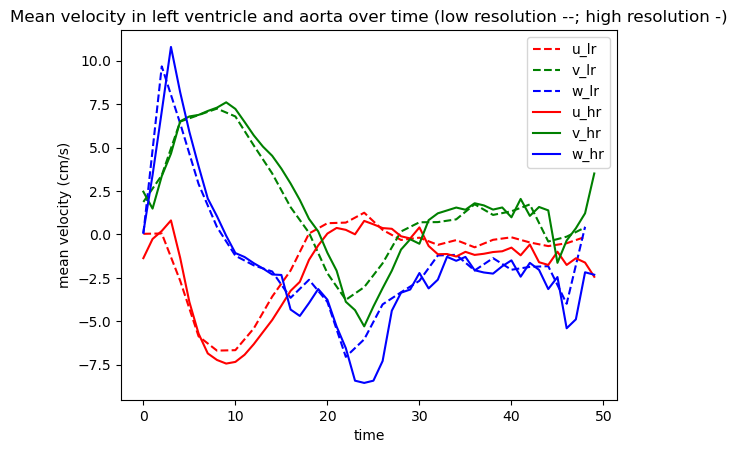

In [63]:
# plot mean velocity over time in each direction

u_lr_mean = np.mean(u_lr,axis=(1,2,3), where=mask.astype(bool))
v_lr_mean = np.mean(v_lr,axis=(1,2,3), where=mask.astype(bool))
w_lr_mean = np.mean(w_lr,axis=(1,2,3), where=mask.astype(bool))

u_hr_mean = np.mean(u_hr, axis=(1,2,3), where=mask.astype(bool))
v_hr_mean = np.mean(v_hr, axis=(1,2,3), where=mask.astype(bool))
w_hr_mean = np.mean(w_hr, axis=(1,2,3), where=mask.astype(bool))

plt.figure()
plt.plot(range(0, len(u_hr), 2), u_lr_mean, '--',  label='u_lr',  color = 'r')
plt.plot(range(0, len(u_hr), 2), v_lr_mean, '--',  label='v_lr',  color = 'g')
plt.plot(range(0, len(u_hr), 2), w_lr_mean, '--',  label='w_lr',  color = 'b')
plt.plot(u_hr_mean, label='u_hr',  color = 'r')
plt.plot(v_hr_mean, label='v_hr',  color = 'g')
plt.plot(w_hr_mean, label='w_hr',  color = 'b')
plt.legend()
plt.xlabel('time')
plt.ylabel('mean velocity (cm/s)')
plt.title('Mean velocity in left ventricle and aorta over time (low resolution --; high resolution -)')
plt.show()


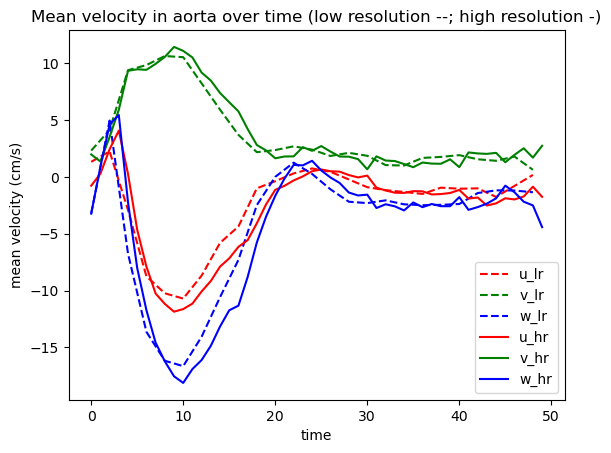

In [64]:
# plot mean velocity over time in each direction

u_lr_mean = np.mean(u_lr,axis=(1,2,3), where=mask_aorta.astype(bool))
v_lr_mean = np.mean(v_lr,axis=(1,2,3), where=mask_aorta.astype(bool))
w_lr_mean = np.mean(w_lr,axis=(1,2,3), where=mask_aorta.astype(bool))

u_hr_mean = np.mean(u_hr, axis=(1,2,3), where=mask_aorta.astype(bool))
v_hr_mean = np.mean(v_hr, axis=(1,2,3), where=mask_aorta.astype(bool))
w_hr_mean = np.mean(w_hr, axis=(1,2,3), where=mask_aorta.astype(bool))

plt.figure()
plt.plot(range(0, len(u_hr), 2), u_lr_mean, '--',  label='u_lr',  color = 'r')
plt.plot(range(0, len(u_hr), 2), v_lr_mean, '--',  label='v_lr',  color = 'g')
plt.plot(range(0, len(u_hr), 2), w_lr_mean, '--',  label='w_lr',  color = 'b')
plt.plot(u_hr_mean, label='u_hr',  color = 'r')
plt.plot(v_hr_mean, label='v_hr',  color = 'g')
plt.plot(w_hr_mean, label='w_hr',  color = 'b')
plt.legend()
plt.xlabel('time')
plt.ylabel('mean velocity (cm/s)')
plt.title('Mean velocity in aorta over time (low resolution --; high resolution -)')
plt.show()


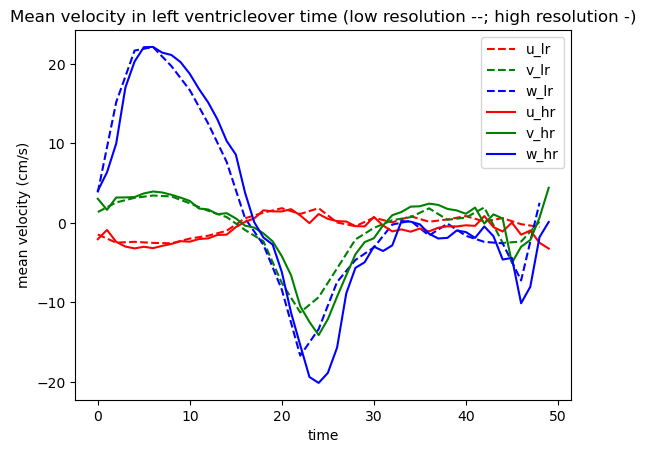

In [65]:
# plot mean velocity over time in each direction - left ventricle 

u_lr_mean = np.mean(u_lr,axis=(1,2,3), where=mask_lv.astype(bool))
v_lr_mean = np.mean(v_lr,axis=(1,2,3), where=mask_lv.astype(bool))
w_lr_mean = np.mean(w_lr,axis=(1,2,3), where=mask_lv.astype(bool))

u_hr_mean = np.mean(u_hr, axis=(1,2,3), where=mask_lv.astype(bool))
v_hr_mean = np.mean(v_hr, axis=(1,2,3), where=mask_lv.astype(bool))
w_hr_mean = np.mean(w_hr, axis=(1,2,3), where=mask_lv.astype(bool))

plt.figure()
plt.plot(range(0, len(u_hr), 2), u_lr_mean, '--',  label='u_lr',  color = 'r')
plt.plot(range(0, len(u_hr), 2), v_lr_mean, '--',  label='v_lr',  color = 'g')
plt.plot(range(0, len(u_hr), 2), w_lr_mean, '--',  label='w_lr',  color = 'b')
plt.plot(u_hr_mean, label='u_hr',  color = 'r')
plt.plot(v_hr_mean, label='v_hr',  color = 'g')
plt.plot(w_hr_mean, label='w_hr',  color = 'b')
plt.legend()
plt.xlabel('time')
plt.ylabel('mean velocity (cm/s)')
plt.title('Mean velocity in left ventricleover time (low resolution --; high resolution -)')
plt.show()


In [66]:
# plot qualitative comparison of velocity fields

# next step: scale all visualizations to the same color range

T, X, Y, Z = u_hr.shape

@widgets.interact(frame=(0, T-1), x=(0, X-1), axis=[0, 1, 2])
def visualize_lr(frame=0, x=0, axis=0):
    plt.figure(figsize=(12, 7))
    N = 4
    idxs_hr = get_indices(frame, axis, x)
    idxs_lr = get_indices(frame//2, axis, x)
    idxs_mask = get_spatial_indices(axis, x)

    plt.subplot(2, N, 1)
    plt.imshow(u_lr[idxs_lr]*mask[idxs_mask])
    plt.title('u lr')
    plt.axis('off')

    plt.subplot(2, N, 2)
    plt.imshow(v_lr[idxs_lr]*mask[idxs_mask])
    plt.title('v lr')
    plt.axis('off')

    plt.subplot(2, N, 3)
    plt.imshow(w_lr[idxs_lr]*mask[idxs_mask])
    plt.title('w lr')
    plt.axis('off')

    plt.subplot(2, N, 4)
    plt.imshow(mask[idxs_mask])
    plt.title('mask')
    # plt.axis('off')


    plt.subplot(2, N, 5)
    plt.imshow(u_hr[idxs_hr]*mask[idxs_mask])
    plt.title('u hr')
    plt.axis('off')

    plt.subplot(2, N, 6)
    plt.imshow(v_hr[idxs_hr]*mask[idxs_mask])
    plt.title('v hr')
    plt.axis('off')

    plt.subplot(2, N, 7)
    plt.imshow(w_hr[idxs_hr]*mask[idxs_mask])
    plt.title('w hr')
    plt.axis('off')

    plt.subplot(2, N, 8)
    plt.imshow(mask[idxs_mask])
    plt.title('mask')



interactive(children=(IntSlider(value=0, description='frame', max=49), IntSlider(value=0, description='x', max…

Plotting correlation lines...


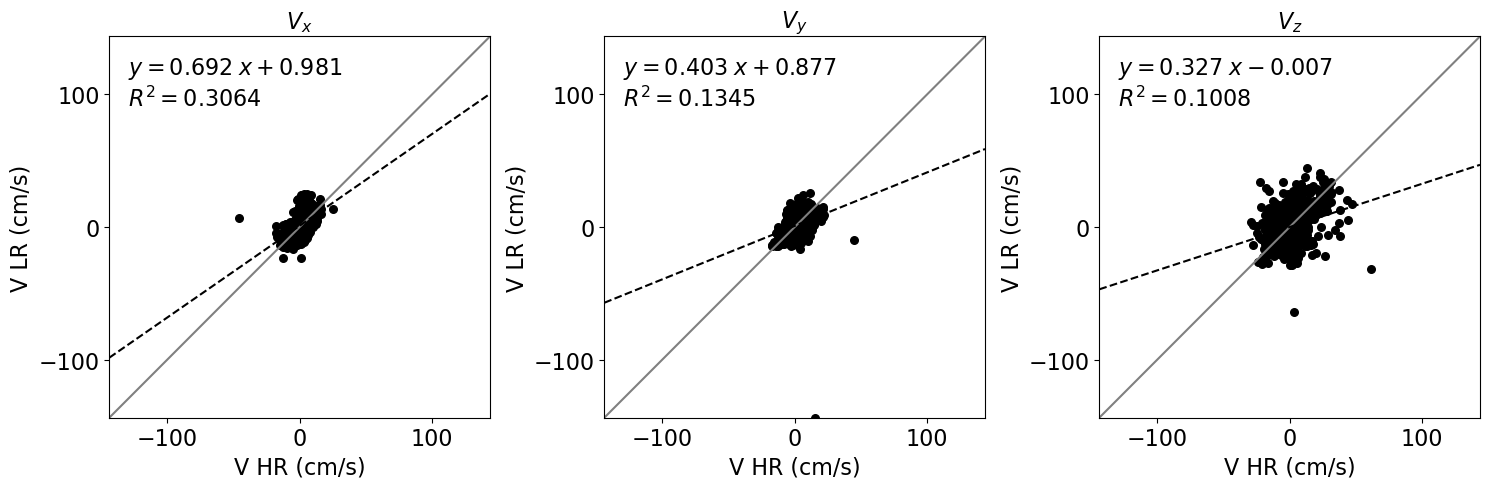

In [67]:
# correlation between low and high resolution velocity fields

from utils.evaluate_utils import random_indices3D

frame_idx = 0

fontsize = 16
# set percentage of how many random points are used
p = 0.1

# get indices of core 
idx_core = np.where(mask == 1)

# get random indices for core to plot a subset of the points
x_idx, y_idx, z_idx = random_indices3D((mask), n=int(p*np.count_nonzero(mask)))

# Get velocity values in all directions
# HR
hr_u_rnd = u_hr[frame_idx, x_idx, y_idx, z_idx]
hr_v_rnd = v_hr[frame_idx, x_idx, y_idx, z_idx]
hr_w_rnd = w_hr[frame_idx, x_idx, y_idx, z_idx]

# LR 
lr_u_rnd = u_lr[frame_idx//2, x_idx, y_idx, z_idx]
lr_v_rnd = v_lr[frame_idx//2, x_idx, y_idx, z_idx]
lr_w_rnd = w_lr[frame_idx//2, x_idx, y_idx, z_idx]

def plot_regression_points(hr_vals, sr_vals, all_hr, all_sr, direction = 'u'):
    N = 100
    # make sure that the range is the same for all plots and make square range
    x_range = np.linspace(-abs_max, abs_max, N)
    
    corr_line, text = get_corr_line_and_r2(all_hr, all_sr, x_range)

    # plot linear correlation line and parms
    
    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')
    plt.plot(x_range, x_range, color= 'grey', label = 'diagonal line')
    plt.plot(x_range, corr_line, 'k--')
    plt.scatter(hr_vals, sr_vals, s=30, c='black', label = 'core voxels')
    
    plt.title(direction, fontsize=fontsize)
    plt.xlabel("V HR (cm/s)", fontsize=fontsize)
    plt.ylabel("V LR (cm/s)", fontsize=fontsize)
    plt.ylim(-abs_max, abs_max)
    plt.xlim(-abs_max, abs_max)
    plt.locator_params(axis='y', nbins=3)
    plt.locator_params(axis='x', nbins=3)
    plt.tick_params(axis='y', labelsize = fontsize)
    plt.tick_params(axis='x', labelsize = fontsize)

def get_corr_line_and_r2(hr_vals, sr_vals, x_range):
    '''
    Returns correlation line and text for plot
    '''
    z = np.polyfit(hr_vals, sr_vals, 1)
    corr_line = np.poly1d(z)(x_range)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(hr_vals, sr_vals)
    text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r_value**2:0.4f}$"
    
    return corr_line, text

    
print("Plotting correlation lines...")

min_vals = np.min([np.min(lr_u_rnd), np.min(lr_v_rnd), np.min(lr_w_rnd)])
max_vals = np.max([np.max(lr_u_rnd), np.max(lr_v_rnd), np.max(lr_w_rnd)])
abs_max  = np.max([np.abs(min_vals), np.abs(max_vals)])

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plot_regression_points(hr_u_rnd, lr_u_rnd, u_hr[frame_idx][idx_core], u_lr[frame_idx//2][idx_core], direction=r'$V_x$')
plt.subplot(1, 3, 2)
plot_regression_points(hr_v_rnd, lr_v_rnd, v_hr[frame_idx][idx_core], v_lr[frame_idx//2][idx_core], direction=r'$V_y$')
plt.subplot(1, 3, 3)
plot_regression_points(hr_w_rnd, lr_w_rnd, w_hr[frame_idx][idx_core], w_lr[frame_idx//2][idx_core], direction=r'$V_z$')
plt.tight_layout()


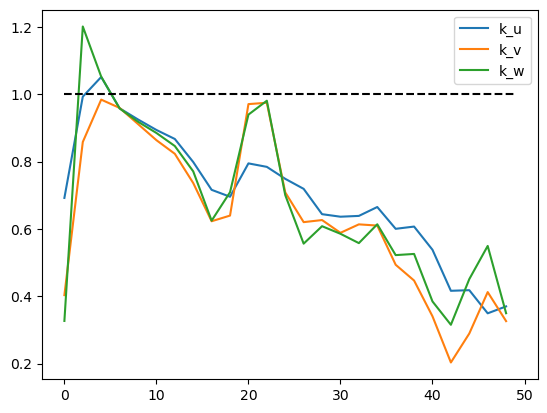

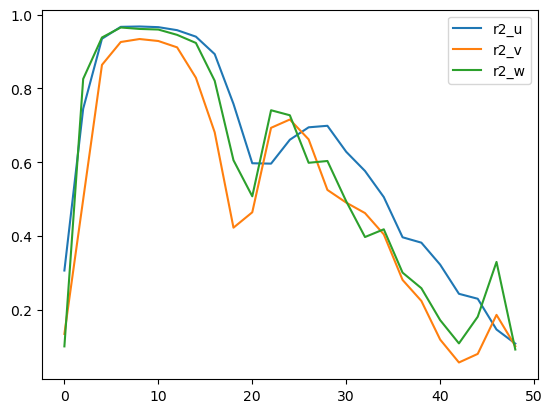

In [68]:
# plot k and r2 values for each direction over time 

from utils.evaluate_utils import calculate_k_R2_timeseries

k_u, r2_u = calculate_k_R2_timeseries(u_lr, u_hr[::2], np.repeat(mask[np.newaxis, ...], T, axis=0))
k_v, r2_v = calculate_k_R2_timeseries(v_lr, v_hr[::2], np.repeat(mask[np.newaxis, ...], T, axis=0))
k_w, r2_w = calculate_k_R2_timeseries(w_lr, w_hr[::2], np.repeat(mask[np.newaxis, ...], T, axis=0))

plt.figure()
plt.plot(range(0, T, 2), k_u, label='k_u')
plt.plot(range(0, T, 2), k_v, label='k_v')
plt.plot(range(0, T, 2), k_w, label='k_w')
plt.plot(range(0, T), np.ones(T), '--', color='black')
plt.legend()


plt.figure()
plt.plot(range(0, T, 2), r2_u, label='r2_u')
plt.plot(range(0, T, 2), r2_v, label='r2_v')
plt.plot(range(0, T, 2), r2_w, label='r2_w')
plt.legend()